# Лабораторная работа №1
## Выполнил студент группы БВТ2301 Козырев Матвей Андреевич

### Оглавление
1. [Задание 1](#Задание-№1)
2. [Задание 2](#Задание-№2)
3. [Задание 3](#Задание-№3)
4. [Вывод](#Вывод)

### Задание №1
<i> Вызвать функцию print() и передать туда строку Hello, World! </i>

In [1]:
print('Hello, World!')

Hello, World!


### Задание №2
Написать генератор случайных матриц(многомерных), который принимает
опциональные параметры <b>m</b>, <b>n</b>, <b>min_limit</b>, <b>max_limit</b>, где <b>m</b> и <b>n</b> указывают размер
матрицы, а <b>min_lim</b> и <b>max_lim</b> - минимальное и максимальное значение для
генерируемого числа.

In [2]:
import random
import time

In [3]:
# user_m = int(input())
# user_n = int(input())
# user_min_limit = int(input())
# user_max_limit = int(input())

def generate_matrix(m, n, min_limit, max_limit):
    return [[random.randint(min_limit, max_limit) for _ in range(m)] for _ in range(n)]

# print(generate_matrix(user_m, user_n, user_min_limit, user_max_limit))

### Задание №3
Реализовать методы сортировки строк числовой матрицы в соответствии с
заданием. Оценить время работы каждого алгоритма сортировки и сравнить его со
временем стандартной функции сортировки. Испытания проводить на сгенерированных
матрицах.

In [4]:
import copy

In [5]:
import matplotlib.pyplot as plt
# Построение графика
def sort_plot(sizes,time_standard,time):
  print(sizes)
  print(time_standard)
  print(time)
  plt.plot(sizes, time, label="Выбранная сортировка", color='green')
  plt.plot(sizes, time_standard, label="Стандартная сортировка", color = 'blue')
  plt.xlabel('Размер матрицы (строки x столбцы)')
  plt.ylabel('Время выполнения (милисекунды)')
  plt.title('Сравнение времени выполнения сортировки')
  plt.legend()
  plt.grid(True)
  plt.show()

In [55]:
#Стандартная сортировка
def sort_standard(matrix):
  start_time = time.time()
  for row in matrix:
    row.sort()
  time_standard = round((time.time() - start_time)*1000)
  print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))
  return time_standard


In [64]:
# Сортировка выбором.
# Берётся срез массива, в котором минимальный элемент переносят в самый левый угол,
# после чего срез уменьшается и цикл повторяется.
def sort_selection(matrix):
    start_time = time.time()  # Запускаем таймер

    for row in matrix:
        for i in range(len(row)):
            min_i = i  # Индекс минимального элемента
            for j in range(i + 1, len(row)):
                if row[j] < row[min_i]:
                    min_i = j  # Обновляем индекс минимального элемента
            # Меняем местами текущий элемент и минимальный
            row[i], row[min_i] = row[min_i], row[i]

    # Вычисляем время выполнения
    time_selection = round((time.time() - start_time) * 1000)
    print(f"--- {time_selection} ms ---")  # Выводим время
    return time_selection

Сколько раз вы хотите тестировать сортировку? 10
---Тест номер 1---
Количество строк: 100
Количество столбцов: 100
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 1 ms ---
--- 23 ms ---
---Тест 1 окончен---
---Тест номер 2---
Количество строк: 200
Количество столбцов: 200
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 2 ms ---
--- 90 ms ---
---Тест 2 окончен---
---Тест номер 3---
Количество строк: 300
Количество столбцов: 300
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 8 ms ---
--- 538 ms ---
---Тест 3 окончен---
---Тест номер 4---
Количество строк: 400
Количество столбцов: 400
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 11 ms ---
--- 818 ms ---
---Тест 4 окончен---
---Тест номер 5---
Количество строк: 500
Количество столбцов: 500
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1

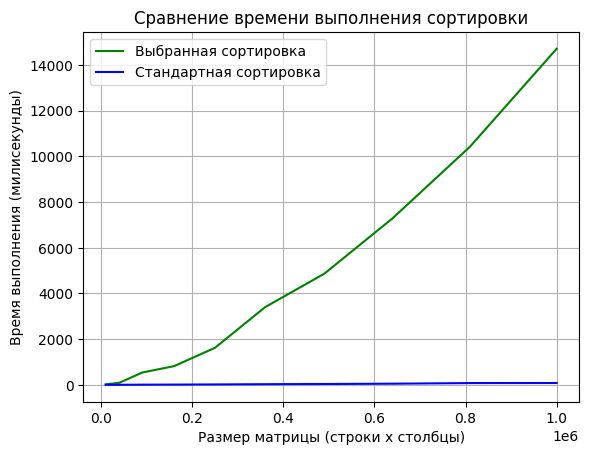

In [66]:
n = int(input('Сколько раз вы хотите тестировать сортировку? '))
time_standard = []
time_selection = []
sizes = []
for i in range(n):
  print(f'---Тест номер {i + 1}---')
  user_m = int(input('Количество строк: '))
  user_n = int(input('Количество столбцов: '))
  user_min_limit = int(input('Минимальное значения для рандомайзера: '))
  user_max_limit = int(input('Максимальное значения для рандомайзера: '))

  sizes.append(user_m * user_n)
  matrix_1 = generate_matrix(user_m, user_n, user_min_limit, user_max_limit)
  matrix_2 = copy.deepcopy(matrix_1)
  time_standard.append(sort_standard(matrix_1))
  time_selection.append(sort_selection(matrix_2))

  print(f'---Тест {i + 1} окончен---')

sort_plot(sizes, time_standard, time_selection)

Как мы видим, проведя 3 теста, мы получили, что сортировка выбором работает O(n^2), а вот стандартная сортировка О(n log n). Время выполнения сортировки выбором растет квадратично (O(n^2)), что видно по резкому увеличению времени с ростом размера матрицы. Это связано с тем, что для каждого элемента выполняется поиск минимального значения в оставшейся части массива, что требует значительных вычислительных ресурсов на больших данных.

Время выполнения стандартной сортировки растет гораздо медленнее, что соответствует сложности O(n log n). Это связано с использованием более эффективных алгоритмов, которые оптимизированы для работы с большими объемами данных.

In [57]:
def sort_insert(matrix):
    start_time = time.time()  # Запускаем таймер

    for row in matrix:
        for i in range(1, len(row)):
            key = row[i]  # Текущий элемент для вставки
            j = i - 1
            # Сдвигаем элементы, которые больше key, вправо
            while j >= 0 and row[j] > key:
                row[j + 1] = row[j]
                j -= 1
            # Вставляем key в правильное место
            row[j + 1] = key

    # Вычисляем время выполнения
    time_insert = round((time.time() - start_time) * 1000)
    print(f"--- {time_insert} ms ---")  # Выводим время
    return time_insert


Сколько раз вы хотите тестировать сортировку? 10
---Тест номер 1---
Количество строк: 100
Количество столбцов: 100
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 1 ms ---
--- 13 ms ---
---Тест 1 окончен---
---Тест номер 2---
Количество строк: 200
Количество столбцов: 200
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 2 ms ---
--- 100 ms ---
---Тест 2 окончен---
---Тест номер 3---
Количество строк: 300
Количество столбцов: 300
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 6 ms ---
--- 335 ms ---
---Тест 3 окончен---
---Тест номер 4---
Количество строк: 400
Количество столбцов: 400
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 11 ms ---
--- 789 ms ---
---Тест 4 окончен---
---Тест номер 5---
Количество строк: 500
Количество столбцов: 500
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 

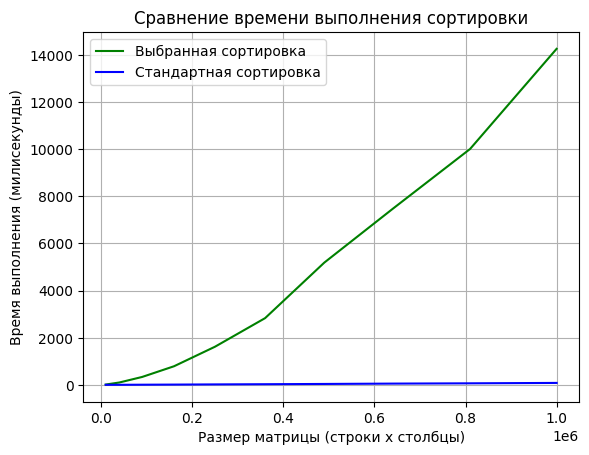

In [67]:
n = int(input('Сколько раз вы хотите тестировать сортировку? '))
time_standard = []
time_insert = []
sizes = []
for i in range(n):
  print(f'---Тест номер {i + 1}---')
  user_m = int(input('Количество строк: '))
  user_n = int(input('Количество столбцов: '))
  user_min_limit = int(input('Минимальное значения для рандомайзера: '))
  user_max_limit = int(input('Максимальное значения для рандомайзера: '))

  sizes.append(user_m * user_n)
  matrix_1 = generate_matrix(user_m, user_n, user_min_limit, user_max_limit)
  matrix_2 = copy.deepcopy(matrix_1)
  time_standard.append(sort_standard(matrix_1))
  time_insert.append(sort_insert(matrix_2))

  print(f'---Тест {i + 1} окончен---')
sort_plot(sizes, time_standard, time_insert)

In [61]:
def sort_bubble(matrix):
    start_time = time.time()  # Запускаем таймер

    for row in matrix:
        n = len(row)
        for i in range(n):
            swapped = False  # Флаг для оптимизации
            for j in range(0, n - i - 1):
                if row[j] > row[j + 1]:
                    # Меняем элементы местами
                    row[j], row[j + 1] = row[j + 1], row[j]
                    swapped = True
            # Если не было обменов, массив уже отсортирован
            if not swapped:
                break

    # Вычисляем время выполнения
    time_bubble = round((time.time() - start_time) * 1000)
    print(f"--- {time_bubble} ms ---")  # Выводим время
    return time_bubble


Сколько раз вы хотите тестировать сортировку? 10
---Тест номер 1---
Количество строк: 100
Количество столбцов: 100
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 1 ms ---
--- 55 ms ---
---Тест 1 окончен---
---Тест номер 2---
Количество строк: 200
Количество столбцов: 200
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 3 ms ---
--- 233 ms ---
---Тест 2 окончен---
---Тест номер 3---
Количество строк: 300
Количество столбцов: 300
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 6 ms ---
--- 782 ms ---
---Тест 3 окончен---
---Тест номер 4---
Количество строк: 400
Количество столбцов: 400
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 18 ms ---
--- 2017 ms ---
---Тест 4 окончен---
---Тест номер 5---
Количество строк: 500
Количество столбцов: 500
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера:

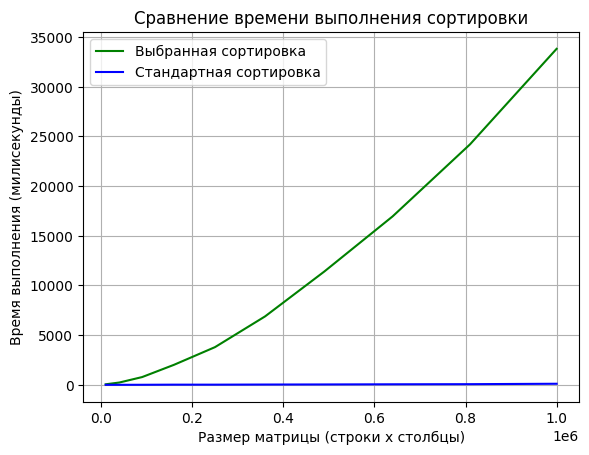

In [68]:
n = int(input('Сколько раз вы хотите тестировать сортировку? '))
time_standard = []
time_bubble = []
sizes = []
for i in range(n):
  print(f'---Тест номер {i + 1}---')
  user_m = int(input('Количество строк: '))
  user_n = int(input('Количество столбцов: '))
  user_min_limit = int(input('Минимальное значения для рандомайзера: '))
  user_max_limit = int(input('Максимальное значения для рандомайзера: '))

  sizes.append(user_m * user_n)
  matrix_1 = generate_matrix(user_m, user_n, user_min_limit, user_max_limit)
  matrix_2 = copy.deepcopy(matrix_1)
  time_standard.append(sort_standard(matrix_1))
  time_bubble.append(sort_bubble(matrix_2))

  print(f'---Тест {i + 1} окончен---')
sort_plot(sizes, time_standard, time_bubble)

In [73]:
def sort_shell(matrix):
    start_time = time.time()

    for row in matrix:
        n = len(row)
        gap = n // 2

        while gap > 0:
            for i in range(gap, n):
                temp = row[i]
                j = i
                while j >= gap and row[j - gap] > temp:
                    row[j] = row[j - gap]
                    j -= gap
                row[j] = temp
            gap //= 2  # Уменьшаем шаг

    time_shell = round((time.time() - start_time) * 1000)
    print(f"--- {time_shell} ms ---")  # Выводим время
    return time_shell


Сколько раз вы хотите тестировать сортировку? 10
---Тест номер 1---
Количество строк: 100
Количество столбцов: 100
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 1 ms ---
--- 7 ms ---
---Тест 1 окончен---
---Тест номер 2---
Количество строк: 200
Количество столбцов: 200
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 3 ms ---
--- 30 ms ---
---Тест 2 окончен---
---Тест номер 3---
Количество строк: 300
Количество столбцов: 300
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 6 ms ---
--- 71 ms ---
---Тест 3 окончен---
---Тест номер 4---
Количество строк: 400
Количество столбцов: 400
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 11 ms ---
--- 149 ms ---
---Тест 4 окончен---
---Тест номер 5---
Количество строк: 500
Количество столбцов: 500
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 100

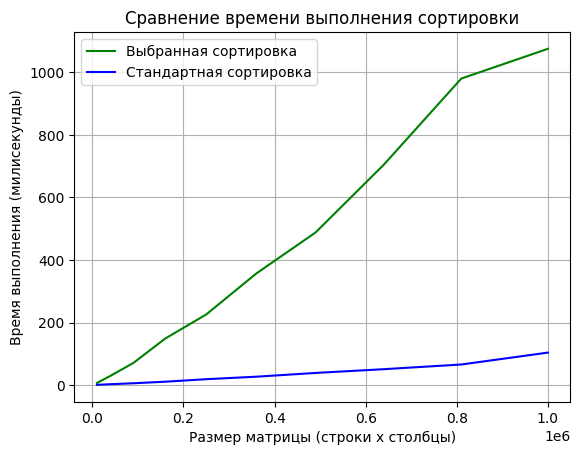

In [74]:
n = int(input('Сколько раз вы хотите тестировать сортировку? '))
time_standard = []
time_shell = []
sizes = []
for i in range(n):
  print(f'---Тест номер {i + 1}---')
  user_m = int(input('Количество строк: '))
  user_n = int(input('Количество столбцов: '))
  user_min_limit = int(input('Минимальное значения для рандомайзера: '))
  user_max_limit = int(input('Максимальное значения для рандомайзера: '))

  sizes.append(user_m * user_n)
  matrix_1 = generate_matrix(user_m, user_n, user_min_limit, user_max_limit)
  matrix_2 = copy.deepcopy(matrix_1)
  time_standard.append(sort_standard(matrix_1))
  time_shell.append(sort_shell(matrix_2))

  print(f'---Тест {i + 1} окончен---')
sort_plot(sizes, time_standard, time_shell)

+- все идет также, но с каждым алгоритмом скорость выполнения начинает снижаться

In [78]:
def quick_sort(row):
    """Рекурсивная быстрая сортировка для одной строки"""
    if len(row) <= 1:
        return row

    pivot = row[-1]  # Опорный элемент (последний)
    less = [x for x in row if x < pivot]
    equal = [x for x in row if x == pivot]
    greater = [x for x in row if x > pivot]

    return quick_sort(less) + equal + quick_sort(greater)

def sort_quick(matrix):
    """Применяет быструю сортировку ко всем строкам матрицы"""
    start_time = time.time()

    for i in range(len(matrix)):
        matrix[i] = quick_sort(matrix[i])  # Сортируем каждую строку

    time_quick = round((time.time() - start_time) * 1000)
    print(f"--- {time_quick} ms ---")  # Выводим время
    return time_quick


Сколько раз вы хотите тестировать сортировку? 10
---Тест номер 1---
Количество строк: 100
Количество столбцов: 100
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 1 ms ---
--- 10 ms ---
---Тест 1 окончен---
---Тест номер 2---
Количество строк: 200
Количество столбцов: 200
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 2 ms ---
--- 38 ms ---
---Тест 2 окончен---
---Тест номер 3---
Количество строк: 300
Количество столбцов: 300
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 6 ms ---
--- 87 ms ---
---Тест 3 окончен---
---Тест номер 4---
Количество строк: 400
Количество столбцов: 400
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 12 ms ---
--- 162 ms ---
---Тест 4 окончен---
---Тест номер 5---
Количество строк: 500
Количество столбцов: 500
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 10

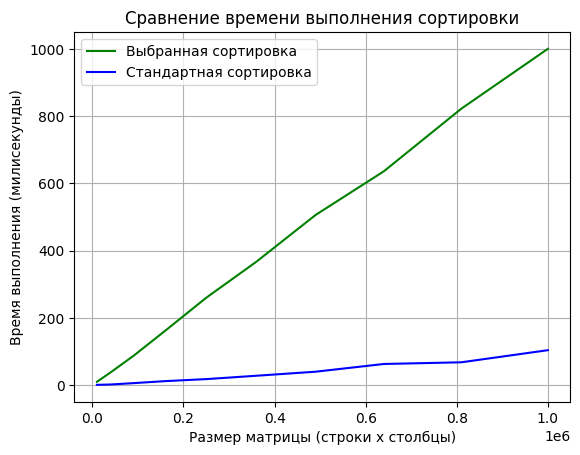

In [79]:
n = int(input('Сколько раз вы хотите тестировать сортировку? '))
time_standard = []
time_quick = []
sizes = []
for i in range(n):
  print(f'---Тест номер {i + 1}---')
  user_m = int(input('Количество строк: '))
  user_n = int(input('Количество столбцов: '))
  user_min_limit = int(input('Минимальное значения для рандомайзера: '))
  user_max_limit = int(input('Максимальное значения для рандомайзера: '))

  sizes.append(user_m * user_n)
  matrix_1 = generate_matrix(user_m, user_n, user_min_limit, user_max_limit)
  matrix_2 = copy.deepcopy(matrix_1)
  time_standard.append(sort_standard(matrix_1))
  time_quick.append(sort_quick(matrix_2))

  print(f'---Тест {i + 1} окончен---')
sort_plot(sizes, time_standard, time_quick)

В быстром алгоритме время явно отличается от остальных алгоритмов.

In [80]:
# Турнирная сортировка.
def sort_tournament(matrix):
  start_time = time.time()
  #TODO
  def build_tree(arr):
      # Строим турнирное дерево
      n = len(arr)
      tree = [None] * (2 * n)

      # Заполняем листья дерева элементами массива
      for i in range(n):
          tree[n + i] = arr[i]

      # Заполняем внутренние узлы дерева
      for i in range(n - 1, 0, -1):
          tree[i] = min(tree[2 * i], tree[2 * i + 1])

      return tree

  def get_min(tree, n):
      # Извлекаем минимальный элемент из корня дерева
      min_val = tree[1]

      # Находим лист, соответствующий минимальному элементу
      i = 1
      while i < n:
          if tree[2 * i] == min_val:
              i = 2 * i
          else:
              i = 2 * i + 1

      # Заменяем минимальный элемент на "бесконечность" и пересчитываем дерево
      tree[i] = float('inf')
      while i > 1:
          i //= 2
          tree[i] = min(tree[2 * i], tree[2 * i + 1])

      return min_val

  for row in matrix:

    n = len(row)
    if n == 0:
        return row

    # Строим турнирное дерево
    tree = build_tree(row)

    # Извлекаем элементы в отсортированном порядке
    sorted_arr = []
    for _ in range(n):
        sorted_arr.append(get_min(tree, n))

    time_tour = round((time.time() - start_time) * 1000)
    print(f"--- {time_tour} ms ---")  # Выводим время
    return time_tour


Сколько раз вы хотите тестировать сортировку? 10
---Тест номер 1---
Количество строк: 100
Количество столбцов: 100
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 1 ms ---
--- 0 ms ---
---Тест 1 окончен---
---Тест номер 2---
Количество строк: 200
Количество столбцов: 200
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 2 ms ---
--- 0 ms ---
---Тест 2 окончен---
---Тест номер 3---
Количество строк: 300
Количество столбцов: 300
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 6 ms ---
--- 1 ms ---
---Тест 3 окончен---
---Тест номер 4---
Количество строк: 400
Количество столбцов: 400
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--- 11 ms ---
--- 1 ms ---
---Тест 4 окончен---
---Тест номер 5---
Количество строк: 500
Количество столбцов: 500
Минимальное значения для рандомайзера: 0
Максимальное значения для рандомайзера: 1000
--

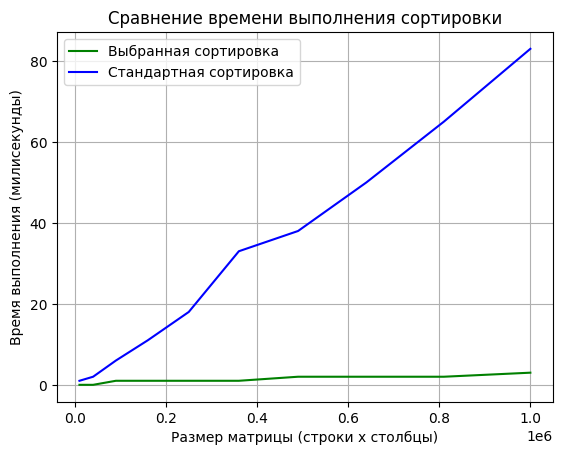

In [81]:
n = int(input('Сколько раз вы хотите тестировать сортировку? '))
time_standard = []
time_tour = []
sizes = []
for i in range(n):
  print(f'---Тест номер {i + 1}---')
  user_m = int(input('Количество строк: '))
  user_n = int(input('Количество столбцов: '))
  user_min_limit = int(input('Минимальное значения для рандомайзера: '))
  user_max_limit = int(input('Максимальное значения для рандомайзера: '))

  sizes.append(user_m * user_n)
  matrix_1 = generate_matrix(user_m, user_n, user_min_limit, user_max_limit)
  matrix_2 = copy.deepcopy(matrix_1)
  time_standard.append(sort_standard(matrix_1))
  time_tour.append(sort_tournament(matrix_2))

  print(f'---Тест {i + 1} окончен---')
sort_plot(sizes, time_standard, time_tour)

[10000, 40000, 90000, 160000, 250000, 360000, 490000, 640000, 810000, 1000000]
[1, 2, 6, 11, 18, 33, 38, 50, 65, 83]
<module 'time' (built-in)>


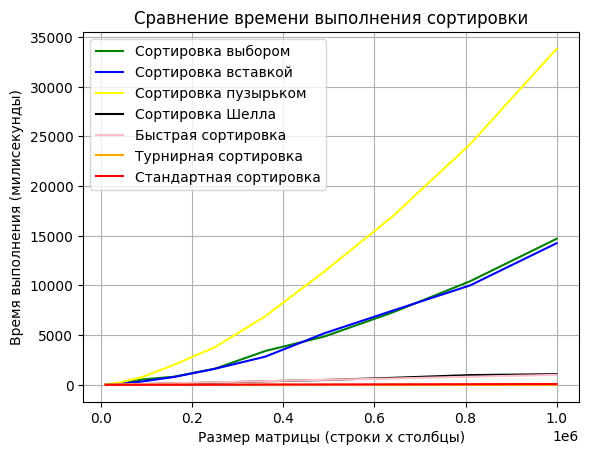

In [82]:
  plt.plot(sizes, time_selection, label="Сортировка выбором", color='green')
  plt.plot(sizes, time_insert, label="Сортировка вставкой", color='blue')
  plt.plot(sizes, time_bubble, label="Сортировка пузырьком", color='yellow')
  plt.plot(sizes, time_shell, label="Сортировка Шелла", color='black')
  plt.plot(sizes, time_quick, label="Быстрая сортировка", color='pink')
  plt.plot(sizes, time_tour, label="Турнирная сортировка", color='orange')
  plt.plot(sizes, time_standard, label="Стандартная сортировка", color = 'red')
  plt.xlabel('Размер матрицы (строки x столбцы)')
  plt.ylabel('Время выполнения (милисекунды)')
  plt.title('Сравнение времени выполнения сортировки')
  plt.legend()
  plt.grid(True)
  plt.show()

### Вывод
